In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 


# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

import datetime as dt
import pandas as pd

### Test codes

In [5]:
test_date = '2021-06-30'
test = dt.datetime.strptime(test_date,"%Y-%m-%d")
print(test.month)

6


In [6]:
# NOTE: using a datetime method on Measurement.date to extract the month as in the code below generates an error
# june_test_results = session.query(Measurement.date, Measurement.tobs).filter(pd.to_datetime(Measurement.date).strptime("%Y-%m-%d").month == 6 ).all()

In [7]:
temps = []
temps = session.query(Measurement.date).all()
print(temps)

[('2010-01-01',), ('2010-01-02',), ('2010-01-03',), ('2010-01-04',), ('2010-01-06',), ('2010-01-07',), ('2010-01-08',), ('2010-01-09',), ('2010-01-10',), ('2010-01-11',), ('2010-01-12',), ('2010-01-14',), ('2010-01-15',), ('2010-01-16',), ('2010-01-17',), ('2010-01-18',), ('2010-01-19',), ('2010-01-20',), ('2010-01-21',), ('2010-01-22',), ('2010-01-23',), ('2010-01-24',), ('2010-01-25',), ('2010-01-26',), ('2010-01-27',), ('2010-01-28',), ('2010-01-30',), ('2010-01-31',), ('2010-02-01',), ('2010-02-03',), ('2010-02-04',), ('2010-02-05',), ('2010-02-06',), ('2010-02-07',), ('2010-02-08',), ('2010-02-09',), ('2010-02-11',), ('2010-02-12',), ('2010-02-13',), ('2010-02-14',), ('2010-02-15',), ('2010-02-16',), ('2010-02-17',), ('2010-02-19',), ('2010-02-20',), ('2010-02-21',), ('2010-02-22',), ('2010-02-23',), ('2010-02-24',), ('2010-02-25',), ('2010-02-26',), ('2010-02-28',), ('2010-03-01',), ('2010-03-02',), ('2010-03-03',), ('2010-03-04',), ('2010-03-05',), ('2010-03-06',), ('2010-03-07'

In [8]:
june_results_test = []
june_results_test = session.query(Measurement.date,Measurement.tobs).filter(extract('month', Measurement.date) == 6 ).all()
june_results_test_df = pd.DataFrame(june_results_test, columns = ['June Dates','June Temps'])
june_results_test_df

,June Dates,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [9]:
june_results_test_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


### Final code

In [10]:
## create a variable to store the results

june_results = []
june_results = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6 ).all()
print(june_results)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [11]:
#  3. Convert the June temperatures to a list.
june_temp_list = list(np.ravel(june_results))
print(june_temp_list)

[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0, 78.0, 78.0, 78.0, 77.0, 78.0, 78.0, 77.0, 77.0, 82.0, 78.0, 78.0, 78.0, 78.0, 78.0, 77.0, 76.0, 78.0, 78.0, 78.0, 78.0, 77.0, 78.0, 73.0, 70.0, 76.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 77.0, 78.0, 78.0, 77.0, 78.0, 78.0, 75.0, 76.0, 76.0, 77.0, 78.0, 76.0, 77.0, 75.0, 77.0, 76.0, 76.0, 75.0, 77.0, 77.0, 76.0, 78.0, 77.0, 76.0, 77.0, 76.0, 76.0, 77.0, 77.0, 78.0, 77.0, 77.0, 77.0, 76.0, 75.0, 76.0, 76.0, 77.0, 76.0, 73.0, 73.0, 75.0, 77.0, 76.0, 77.0, 79.0, 78.0, 79.0, 78.0, 78.0, 79.0, 77.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 76.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 76.0, 77.0, 75.0, 76.0, 74.0, 75.0, 77.0, 76.0, 77.0, 78.0, 79.0, 77.0, 78.0, 79.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 82.0, 80.0, 79.0, 79.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 75.0, 75.0, 76.0, 84.0, 79.0, 76.0, 79.0, 79.0, 77.0, 79.0, 78.0, 78.0, 79.0, 77.0, 79.0, 78.0, 78.0, 78.0, 79.0, 77.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 77.0, 78.0, 78.0, 78.0, 79.

In [12]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp_list, columns = ['June Temps'])
june_temp_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [13]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [14]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_results = []
december_results = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12 ).all()
print(december_results)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [15]:
# 7. Convert the December temperatures to a list.
december_temp_list = list(np.ravel(december_results))
print(december_temp_list)

[76.0, 74.0, 74.0, 64.0, 64.0, 67.0, 77.0, 66.0, 69.0, 68.0, 68.0, 71.0, 74.0, 67.0, 66.0, 69.0, 71.0, 70.0, 70.0, 74.0, 74.0, 71.0, 75.0, 75.0, 72.0, 69.0, 68.0, 73.0, 74.0, 73.0, 73.0, 73.0, 73.0, 71.0, 73.0, 73.0, 77.0, 72.0, 71.0, 73.0, 70.0, 73.0, 69.0, 74.0, 72.0, 71.0, 72.0, 72.0, 70.0, 73.0, 73.0, 72.0, 73.0, 73.0, 72.0, 63.0, 65.0, 71.0, 76.0, 70.0, 76.0, 69.0, 69.0, 69.0, 74.0, 76.0, 74.0, 73.0, 73.0, 74.0, 73.0, 73.0, 73.0, 74.0, 74.0, 71.0, 73.0, 72.0, 64.0, 66.0, 73.0, 72.0, 65.0, 64.0, 69.0, 68.0, 77.0, 71.0, 71.0, 69.0, 68.0, 68.0, 69.0, 70.0, 72.0, 76.0, 75.0, 69.0, 71.0, 71.0, 71.0, 68.0, 65.0, 70.0, 69.0, 69.0, 71.0, 67.0, 73.0, 74.0, 73.0, 67.0, 74.0, 75.0, 75.0, 74.0, 67.0, 73.0, 73.0, 71.0, 72.0, 71.0, 68.0, 65.0, 69.0, 70.0, 70.0, 74.0, 71.0, 74.0, 73.0, 72.0, 74.0, 72.0, 74.0, 75.0, 74.0, 70.0, 74.0, 70.0, 66.0, 61.0, 63.0, 63.0, 63.0, 63.0, 67.0, 56.0, 75.0, 77.0, 75.0, 75.0, 75.0, 75.0, 71.0, 70.0, 74.0, 74.0, 75.0, 72.0, 70.0, 66.0, 74.0, 75.0, 74.0, 75.0, 76.

In [16]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temp_df = pd.DataFrame(december_temp_list, columns = ['December Temps'])
december_temp_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [17]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temp_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

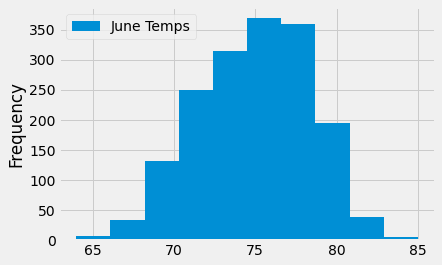

In [19]:
# Plot the June temperature observations
june_temp_df.plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

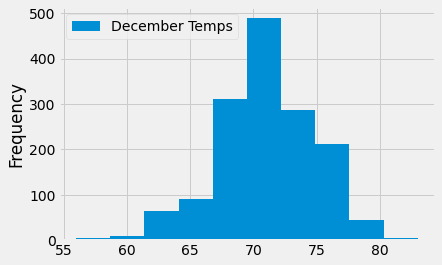

In [20]:
# Plot the December temperature observations
december_temp_df.plot.hist(bins=10)